# Лабораторная работа №5: Сравнение статистических свойств разных точечных оценок математического ожидания и дисперсии.

Цели и задачи л/р: выполнить массовое статистическое моделирование, направленное на 
изучение статистических свойств разных точечных оценок математического ожидания и 
дисперсии, сравнение с теоретически ожидаемыми свойствами, верная статистическая 
интерпретация результатов.

Задание.  
1.  Создать по $N = 10^3$ выборок из нормального распределения с математическим
    ожиданием, равным 0, и дисперсией, равной 1, размером $n = 10, 20, \ldots 100$.
    
    По каждой выборке оценить точечно математическое ожидание через выборочное среднее 
    $c^* = \bar{x} = \frac{1}{n}\cdot\sum_{i=1}^{i=n}x_i$, дисперсию по
    формулам неисправленной и исправленной точечных оценок (т.е. 
    $D^* = \frac{1}{n}\cdot\sum_{i=1}^{i=n}(x_i-\bar{x})^2$ и
    $D^*=\frac{1}{n-1}\cdot\sum_{i=1}^{i=n}(x_i-\bar{x})^2$)

    Получив $N$ оценок (по всем выборкам заданного размера n) оценить их средние
    $M[c^*]$, $M[D^*]$ и дисперсии $D[c^*]$, $D[D^*]$ (также точечно). Сравнить
    полученные результаты с теоретически ожидаемыми (т.е. с точными значениями
    математического ожидания и дисперсии данных оценок – cм. лекцию) в виде
    графиков в зависимости от n. Сделать выводы о смещенности или несмещенности.

2.  Построить по полученным $N$ значениям оценок выборочные функции распределения
    (для $n = 10$ и $n = 100$). Наложить на те же графики теоретические функции
    распределения данных оценок (для тех же размеров графиков) – см. лекцию. Сделать
    выводы.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from pathlib import Path
from tqdm.contrib.concurrent import process_map
import scipy

np.random.seed(42)

/opt/pypy/lib/pypy3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
KEY_SAMPLE_SIZES = [10, 100]
SAMPLE_SIZES = list(range(10, 101, 10))
NUM_EXPERIMENTS = 1000
TRUE_C = 0
TRUE_D = 1
OUT_DIR = Path("lab-5")
OUT_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
def estimate_params(sample: np.ndarray):
    n = len(sample)
    avg = sample.sum() / n
    d_tmp = ((sample - avg) ** 2).sum()
    d = d_tmp / n
    d_fix = d_tmp / (n - 1)
    return avg, d, d_fix

In [4]:
def experiment(args):
    i, n = args
    sample = np.random.normal(loc=TRUE_C, scale=TRUE_D, size=n)
    avg, d, d_fix = estimate_params(sample)
    return [n, avg, d, d_fix]

In [5]:
experiment_args = list(itertools.product(range(NUM_EXPERIMENTS), SAMPLE_SIZES))
rs = process_map(experiment, experiment_args, chunksize=1)

100%|██████████| 10000/10000 [00:10<00:00, 921.20it/s]


In [ ]:
df = pd.DataFrame(rs, columns=["size", "avg", "d_bias", "d"])
df.to_csv(OUT_DIR / "norm.csv", index=False)
df

,size,avg,d,d_fix
0,10,0.448061,0.470467,0.522741
1,20,-0.171299,0.875572,0.921655
2,30,-0.188147,0.783011,0.810012
3,40,-0.218637,0.885149,0.907845
4,50,-0.225474,0.854303,0.871737
...,...,...,...,...
9995,60,-0.012868,0.928853,0.944597
9996,70,0.123687,1.231006,1.248847
9997,80,0.062244,1.015630,1.028486
9998,90,0.096377,1.024556,1.036068


In [3]:
df = pd.read_csv(OUT_DIR / "norm.csv")

In [4]:
chars = df.groupby(["size"]).agg(
    {"avg": ["mean", "var"], "d_bias": ["mean", "var"], "d": ["mean", "var"]}
)
chars

avg              d_bias                   d          
          mean       var      mean       var      mean       var
size                                                            
10    0.015703  0.099029  0.910603  0.188612  1.011781  0.232854
20    0.003623  0.048856  0.938754  0.088645  0.988162  0.098222
30    0.000798  0.033431  0.973348  0.065877  1.006912  0.070498
40   -0.005339  0.022656  0.970839  0.051199  0.995732  0.053858
50    0.005729  0.019074  0.981367  0.037406  1.001395  0.038949
60    0.003262  0.017262  0.987083  0.031475  1.003813  0.032551
70    0.006002  0.014980  0.985570  0.027594  0.999853  0.028399
80   -0.001762  0.013047  0.984985  0.024348  0.997453  0.024968
90   -0.005678  0.011671  0.988170  0.019415  0.999273  0.019853
100  -0.004239  0.009105  0.990505  0.020588  1.000510  0.021006

## Вывод формул точечных оценок

НСВ $X \sim N(\mu, \sigma^2)$ тогда $E[X] = \mu = 0$ и $D[X] = \sigma^2 = 1$.


### Оценка математического ожидания

СВ точечная оценка мат. ожидания $\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i$ для выборки $\langle X_i \rangle, i\in[1,n]$.

#### Математическое ожидание
$$
E[\bar{X}] = E\left[\frac{1}{n}\sum X_i\right]
           = \frac{1}{n}\sum E[X_i]
           = \frac{1}{n}\cdot n \cdot E[X]
           = \mu,
$$

#### Дисперсия
$$
D[\bar{X}] = D\left[\frac{1}{n}\sum X_i\right]
           = \frac{1}{n^2}D\left[\sum X_i\right]
           = \frac{1}{n^2}\sum D[X_i]
           = \frac{1}{n^2}\cdot n\cdot D[X]
           = \frac{\sigma^2}{n}.
$$

### Оценка дисперсии

СВ точечная оценка дисперсии $s^2 = \frac{1}{n-1}\sum_{i=1}^n (X_i - \bar{X})^2$.

#### Математическое ожидание

Преобразуем сумму квадратов: $\sum_{i=1}^n (X_i - \bar{X})^2 = \sum_{i=1}^n X_i^2 - n\bar{X}^2$.

Находим математическое ожидание:
$$
E\left[\sum (X_i - \bar{X})^2\right] = E\left[\sum X_i^2 - n\bar{X}^2\right]
                                            = \sum E[X_i^2] - nE[\bar{X}^2].
$$

Используем $E[Y^2] = D[Y] + (E[Y])^2$:
$$
E[X_i^2] = D[X_i] + (E[X_i])^2 = \sigma^2 + \mu^2,
$$
$$
E[\bar{X}^2] = D[\bar{X}] + (E[\bar{X}])^2 = \frac{\sigma^2}{n} + \mu^2.
$$

Подставляем:
$$
E\left[\sum_{i=1}^n (X_i - \bar{X})^2\right] = \sum_{i=1}^n (\sigma^2 + \mu^2) - n\left(\frac{\sigma^2}{n} + \mu^2\right)
                                            = n\sigma^2 + n\mu^2 - \sigma^2 - n\mu^2
                                            = (n-1)\sigma^2.
$$

Следовательно:
$$
E[s^2] = E\left[\frac{1}{n-1}\sum_{i=1}^n (X_i - \bar{X})^2\right]
       = \frac{1}{n-1} \cdot (n-1)\sigma^2
       = \sigma^2.
$$

#### Дисперсия

При нормальности известно, что:
$$
\frac{(n-1)s^2}{\sigma^2} \sim \chi^2(n-1).
$$

Используем свойства распределения $\chi^2$: если $Y \sim \chi^2(k)$, то $E[Y] = k$, $D[Y] = 2k$.

Тогда:
$$
E\left[\frac{(n-1)s^2}{\sigma^2}\right] = n-1 \quad \Rightarrow \quad E[s^2] = \sigma^2,
$$

$$
D\left[\frac{(n-1)s^2}{\sigma^2}\right] = 2(n-1).
$$

Преобразуем:
$$
D\left[\frac{(n-1)s^2}{\sigma^2}\right] = \frac{(n-1)^2}{\sigma^4}D[s^2] = 2(n-1).
$$

Отсюда:
$$
D[s^2] = \frac{2(n-1)\sigma^4}{(n-1)^2} = \frac{2\sigma^4}{n-1}.
$$

### Смещенная оценка дисперсии

Смещенная точечная оценка дисперсии: $s_0^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2$,

#### Математическое ожидание

Преобразуем сумму квадратов: $\sum_{i=1}^n (x_i - \bar{x})^2 = \sum_{i=1}^n x_i^2 - n\bar{x}^2$.

Находим математическое ожидание:
$$
E\left[\sum_{i=1}^n (x_i - \bar{x})^2\right] = E\left[\sum_{i=1}^n x_i^2 - n\bar{x}^2\right]
                                            = \sum_{i=1}^n E[x_i^2] - nE[\bar{x}^2].
$$

Используем $E[Y^2] = D[Y] + (E[Y])^2$:
$$
E[x_i^2] = D[x_i] + (E[x_i])^2 = \sigma^2 + \mu^2,
$$
$$
E[\bar{x}^2] = D[\bar{x}] + (E[\bar{x}])^2 = \frac{\sigma^2}{n} + \mu^2.
$$

Подставляем:
$$
E\left[\sum_{i=1}^n (x_i - \bar{x})^2\right] = \sum_{i=1}^n (\sigma^2 + \mu^2) - n\left(\frac{\sigma^2}{n} + \mu^2\right)
                                            = n\sigma^2 + n\mu^2 - \sigma^2 - n\mu^2
                                            = (n-1)\sigma^2.
$$

Отсюда:
$$
E[s_0^2] = E\left[\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2\right]
         = \frac{1}{n} \cdot (n-1)\sigma^2
         = \frac{n-1}{n}\sigma^2.
$$

#### Дисперсия (при нормальности данных)

Известно, что для нормальных данных: $\frac{(n-1)s^2}{\sigma^2} \sim \chi^2(n-1)$.

Выразим $s_0^2$ через $s^2$: $s_0^2 = \frac{n-1}{n} s^2$.

Тогда:
$$
\frac{n s_0^2}{\sigma^2} = \frac{n}{\sigma^2} \cdot \frac{n-1}{n} s^2 = \frac{(n-1)s^2}{\sigma^2} \sim \chi^2(n-1).
$$

Находим $D[s_0^2]$:
$$
D\left[\frac{n s_0^2}{\sigma^2}\right] = D[\chi^2(n-1)] = 2(n-1).
$$

С другой стороны:
$$
D\left[\frac{n s_0^2}{\sigma^2}\right] = \frac{n^2}{\sigma^4} D[s_0^2].
$$

Приравниваем:
$$
\frac{n^2}{\sigma^4} D[s_0^2] = 2(n-1),
$$
$$
D[s_0^2] = \frac{2(n-1)\sigma^4}{n^2}.
$$


Итого:
| Оценка | Мат. Ожидание | Дисперсия |
| --- | --- | --- |
| Мат. Ожидания | $E[\bar{X}] = \mu$ | $D[\bar{X}] = \frac{\sigma^2}{n}$ |
| Дисперсии | $E[s^2] = \sigma^2$ | $D[s^2] = \frac{2\sigma^4}{n-1}$ | 
| Смещенная дисперсии | $E[s_0^2] = \frac{n-1}{n}\sigma^2$ | $D[s_0^2] = \frac{2(n-1)\sigma^4}{n^2}$ |

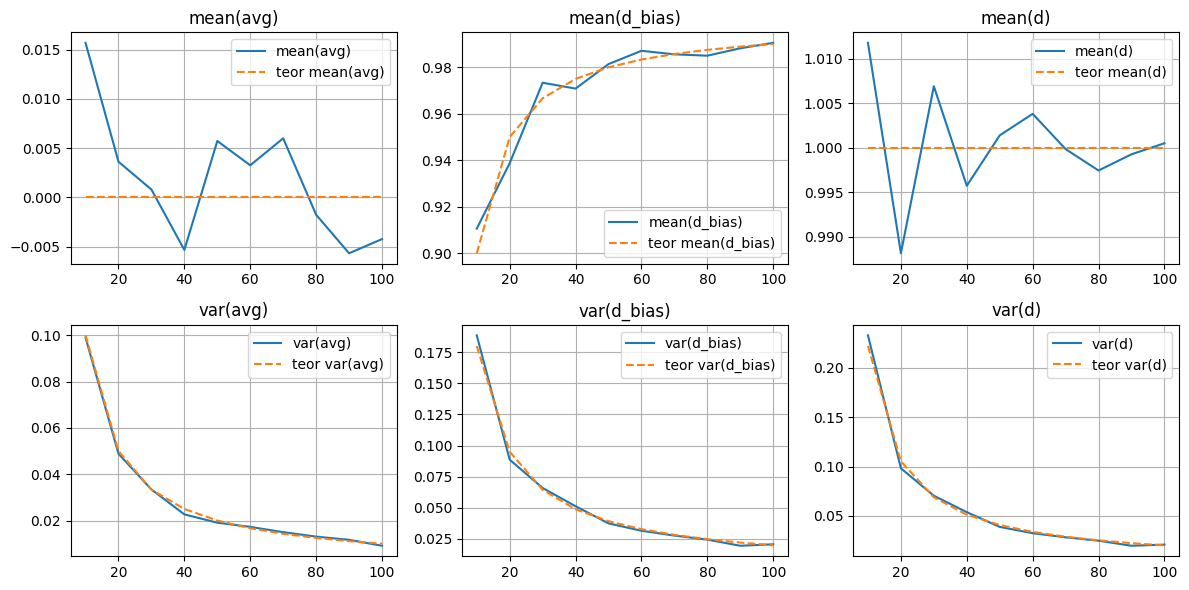

In [65]:
def analyze_estimations():
    chars_names = chars.columns.get_level_values(0).unique()
    chars_chars = chars.columns.get_level_values(1).unique()
    n = len(chars_chars)
    m = len(chars_names)
    figsize = (4 * m, 3 * n)
    fig, axs = plt.subplots(
        n,
        m,
        figsize=(figsize[0], figsize[1]),
        squeeze=True,
    )
    map_char_ax = dict(zip(chars_chars, range(n)))
    map_name_ax = dict(zip(chars_names, range(m)))

    sizes = chars.index

    teor = {
        "avg": {
            "mean": [TRUE_C] * len(sizes),
            "var": TRUE_D / sizes
        },
        "d_bias": {
            "mean": TRUE_D * (sizes - 1) / sizes,
            "var": 2 * (sizes - 1) * (TRUE_D**2) / (sizes**2)
        },
        "d": {
            "mean": [TRUE_D] * len(sizes),
            "var": 2 * (TRUE_D**2) / (sizes - 1)
        }
    }

    for name, char in chars.columns:
        ax = axs[map_char_ax[char], map_name_ax[name]]
        ax.plot(sizes, chars[(name, char)], label=f"{char}({name})")
        ax.plot(sizes, teor[name][char], label=f"teor {char}({name})", linestyle="--")

        ax.grid(True)
        ax.set_title(f"{char}({name})")
        ax.legend()

    fig.tight_layout()

analyze_estimations()

Итого:
| Оценка | Распределение |
| --- | --- |
| Мат. Ожидания | $N(\mu,\frac{\sigma^2}{n})$ |
| Дисперсии | $\frac{(n-1)s^2}{\sigma^2} \sim \chi^2(n-1)$ |
| Смещенная дисперсии | $\frac{n s_0^2}{\sigma^2} \sim \chi^2(n-1)$ |




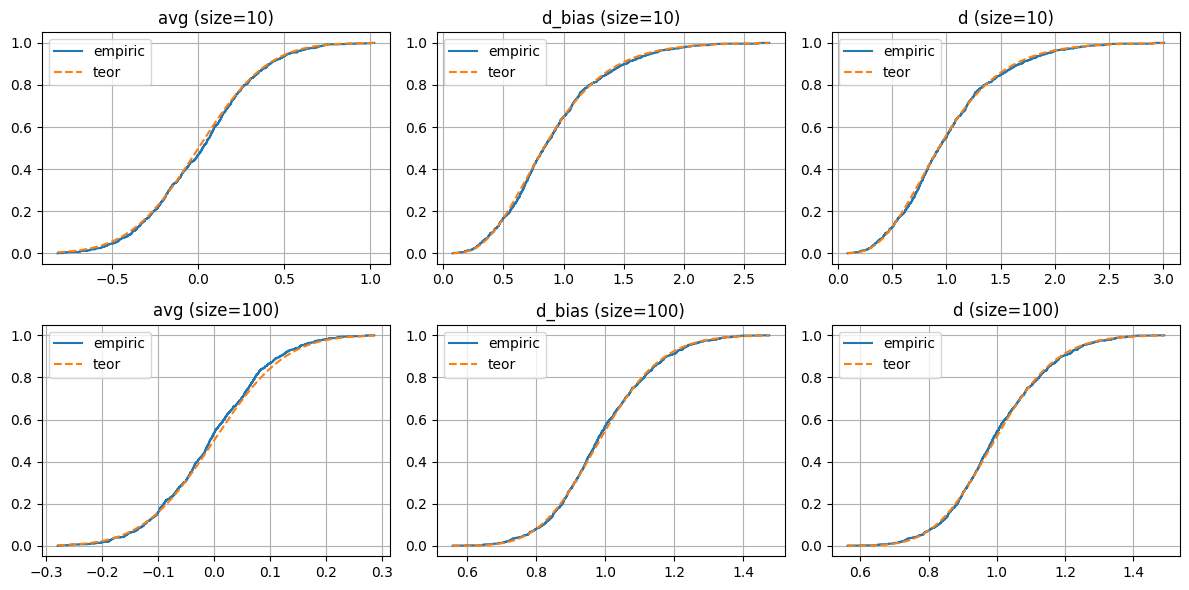

In [66]:
def analyze_distributions():
    chars_names = chars.columns.get_level_values(0).unique()
    n = len(KEY_SAMPLE_SIZES)
    m = len(chars_names)
    figsize = (4 * m, 3 * n)
    fig, axs = plt.subplots(
        n,
        m,
        figsize=(figsize[0], figsize[1]),
        squeeze=True,
    )
    map_size_ax = dict(zip(KEY_SAMPLE_SIZES, range(n)))
    map_name_ax = dict(zip(chars_names, range(m)))

    teor_dist = {
        "avg": lambda sz, xs: scipy.stats.norm.cdf(xs, loc=TRUE_C, scale=TRUE_D / (sz ** 0.5)),
        "d_bias": lambda sz, xs: scipy.stats.chi2.cdf(sz * xs / TRUE_D, df=(sz - 1)),
        "d": lambda sz, xs: scipy.stats.chi2.cdf((sz - 1) * xs / TRUE_D, df=(sz - 1)),
    }

    for size in KEY_SAMPLE_SIZES:
        ests = df[df["size"] == size].drop(columns=["size"])
        for name in ests:
            ax = axs[map_size_ax[size], map_name_ax[name]]
            char_est = np.sort(ests[name])
            ax.step(char_est, np.linspace(0, 1, len(char_est)), label="empiric")

            xs = np.linspace(char_est[0], char_est[-1], len(char_est))
            ax.plot(xs, teor_dist[str(name)](size, xs), label="teor", linestyle="--")

            ax.grid(True)
            ax.set_title(f"{name} ({size=})")
            ax.legend()

    fig.tight_layout()

analyze_distributions()

What it is? :
### 4. Оценка дисперсии для математического ожидания

Оценка $D[\bar{X}]$: $\widehat{D[\bar{X}]} = \frac{s^2}{n}$.

Проверим несмещенность:
$$
E\left[\widehat{D[\bar{X}]}\right] = E\left[\frac{s^2}{n}\right]
                                   = \frac{1}{n}E[s^2]
                                   = \frac{\sigma^2}{n}
                                   = D[\bar{X}].
$$

### 5. Оценка дисперсии для дисперсии

Оценка $D[s^2]$: $\widehat{D[s^2]} = \frac{2(s^2)^2}{n-1}$.

Находим математическое ожидание:
$$
E\left[\widehat{D[s^2]}\right] = E\left[\frac{2(s^2)^2}{n-1}\right]
                               = \frac{2}{n-1}E[(s^2)^2].
$$

Используем $E[(s^2)^2] = D[s^2] + (E[s^2])^2 = \frac{2\sigma^4}{n-1} + \sigma^4$:
$$
E\left[\widehat{D[s^2]}\right] = \frac{2}{n-1}\left(\frac{2\sigma^4}{n-1} + \sigma^4\right)
                               = \frac{4\sigma^4}{(n-1)^2} + \frac{2\sigma^4}{n-1}
                               \neq \frac{2\sigma^4}{n-1} = D[s^2].
$$

Вывод: оценка $\widehat{D[s^2]}$ смещенная, но состоятельная.

---

Выборка $\bar{X}$: $\bar{X} = \langle \bar{X}_j \rangle, j\in[1,m]$.

Выборка $s^2$: $S^2 = \langle s^2_j \rangle, j\in[1,m]$.

Тогда для средних по $m$ измерениям:
$$
E[\bar{X}] = \frac{1}{m}\sum_{j=1}^m E[\bar{X}_j] = \frac{1}{m}\cdot m \cdot \mu = \mu,
$$
$$
D[\bar{X}] = \frac{D[\bar{X}]}{m} = \frac{\sigma^2}{nm},
$$
$$
E[S^2] = \frac{1}{m}\sum_{j=1}^m E[s^2_j] = \frac{1}{m}\cdot m \cdot \sigma^2 = \sigma^2,
$$
$$
D[S^2] = \frac{D[s^2]}{m} = \frac{2\sigma^4}{m(n-1)}.